In [1]:
from pup.unfolder import PhononUnfolder
from pup.plotting import UnfolderPlotting
import matplotlib.pyplot as plt

In [2]:
directories = {'defect_directory':'../example/li3ocl/v_Li/defect/',
                     'host_directory':'../example/li3ocl/v_Li/host',
                    'defect_index':74}

In [3]:
kpaths = {'G-M':[[0.0,0.0,0.0],[0.5,0.5,0.0]]} # you can add more paths but currently only does one at a time

In [ ]:
from tqdm.notebook import tqdm 
data = {}
p = PhononUnfolder(directories,[3,3,3],**{'tqdm_disable':False})
for kpath in tqdm(kpaths):
    data[kpath] = p.run_all(kpath=kpaths[kpath],line_density=100,eigendisplacement_atom='Li')

  0%|          | 0/1 [00:00<?, ?it/s]


 28%|████████████████████████████████████████▍                                                                                                       | 45094/160800 [00:24<01:02, 1845.85it/s]

In [ ]:
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(10,10),dpi=100)
gs = fig.add_gridspec(ncols=len(kpaths),nrows=1,figure=fig)
gs.update(wspace=0)
threshold = 1
g = {}
axes = {}
for i,path in enumerate(kpaths):
    if i == 0:
        axes[i] = fig.add_subplot(gs[0,i])
        axes[i].set_ylim(-5,20)
        axes[i].set_ylabel('Frequency (THz)')
    else:
        axes[i] = fig.add_subplot(gs[0,i])
        axes[i].set_ylim(-5,20)
        axes[i].set_yticks([])
        axes[i].set_yticklabels([])
    g[i] = UnfolderPlotting(data[path]).single_plot_with_weight(axes[i],threshold,s=8,primitive_bs=True)

In [7]:
q = data['G-M']['prim_data']['q']
f = data['G-M']['bs_p']['frequencies'][-1]

In [12]:
f[::-1]

array([[-7.60996091e-08,  2.18611445e-07,  2.22859074e-07,
         4.54434289e+00,  4.54434289e+00,  4.54434289e+00,
         6.65679033e+00,  6.65679033e+00,  6.65679033e+00,
         1.10963108e+01,  1.10963108e+01,  1.10963108e+01,
         1.71429093e+01,  1.71429093e+01,  1.71429093e+01],
       [ 6.70527020e-01,  6.70527020e-01,  1.00226604e+00,
         4.54699909e+00,  4.54699909e+00,  4.84488433e+00,
         6.67603366e+00,  6.67603366e+00,  6.68718360e+00,
         1.10843668e+01,  1.10843668e+01,  1.12806571e+01,
         1.71399594e+01,  1.71399594e+01,  1.71668395e+01],
       [ 1.31982701e+00,  1.31982701e+00,  1.94163070e+00,
         4.55484216e+00,  4.55484216e+00,  5.53645240e+00,
         6.73241281e+00,  6.73241281e+00,  6.77393595e+00,
         1.10491675e+01,  1.10491675e+01,  1.18191507e+01,
         1.71314472e+01,  1.71314472e+01,  1.72503916e+01],
       [ 1.92700545e+00,  1.92700545e+00,  2.77826248e+00,
         4.56752940e+00,  4.56752940e+00,  6.30407200

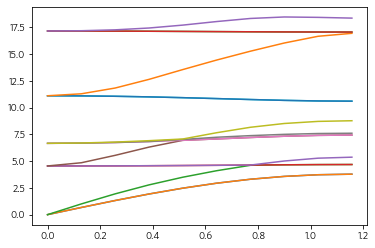

In [13]:
fig,ax = plt.subplots()
ax.plot(q,f[::-1])